In [1]:
# for reproducibility, before importing keras 
# we need to set random numbers in both numpy and tensorflow
import numpy as np
import tensorflow as tf
np.random.seed(98383822)
tf.random.set_seed(2)
import keras

import os
import collections
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import copy

Using TensorFlow backend.


In [2]:
debug=False
verbose=True
doTrain=True
doLoadModel=True
doLoadMetrics=True
doPlotMetrics=True
doPredict=True
doLoadPredict=True
doCalculateMetrics2=True
doPlotMetrics2=True
doCalculateMetrics3=True
doPlotMetrics3=True
modelName="Balanced"
numberOfEpochs=120
batchSize=50000
extensions="png,pdf"

In [3]:
os.getcwd()

'/Volumes/Adrian_SSD/ATLAS/TrackML'

In [4]:
def p(name,nparray):
    print("Start",name)
    print(nparray)
    print("End",name,"shape",nparray.shape,"dtype",nparray.dtype,"type",type(nparray))
# done function

In [5]:
#folderStem="/Volumes/Luiza_SSD"
folderStem="/Volumes/Adrian_SSD"
#folderStem="/Users/abuzatu/Work"
#folderStem="/Users/luizaadelinaciucu/Work"
#
inputFolderName=folderStem+"/ATLAS/TrackML/output_new_ev_000_030"
minNbPositiveHit="04"
outputFolderName=inputFolder=inputFolderName+"_min_"+minNbPositiveHit
# if output folder does not exist, create it
if not os.path.exists(outputFolderName):
    os.makedirs(outputFolderName)

In [6]:
#eventNumber="000000082"
eventNumber="all"


if modelName=="Unbalanced":
    # without Balanced in the names
    #
    nparray_Input_Train=np.load(inputFolderName+"/NN_2_data_Input_Train_"+eventNumber+".npy")
    nparray_Input_Test=np.load(inputFolderName+"/NN_2_data_Input_Test_"+eventNumber+".npy")
    #
    nparray_Output_Train=np.load(inputFolderName+"/NN_2_data_OutputMin"+minNbPositiveHit+"_Train_"+eventNumber+".npy")
    nparray_Output_Test=np.load(inputFolderName+"/NN_2_data_OutputMin"+minNbPositiveHit+"_Test_"+eventNumber+".npy")
    #
    nparray_VolumeID_Train=np.load(inputFolderName+"/NN_2_data_VolumeID_Train_"+eventNumber+".npy")
    nparray_VolumeID_Test=np.load(inputFolderName+"/NN_2_data_VolumeID_Test_"+eventNumber+".npy")

if modelName=="Balanced":
    # with Balanced in the names
    #
    nparray_Input_Train=np.load(inputFolderName+"/NN_2_data_InputBalanced_Train_"+eventNumber+".npy")
    nparray_Input_Test=np.load(inputFolderName+"/NN_2_data_InputBalanced_Test_"+eventNumber+".npy")
    #
    nparray_Output_Train=np.load(inputFolderName+"/NN_2_data_OutputBalancedMin"+minNbPositiveHit+"_Train_"+eventNumber+".npy")
    nparray_Output_Test=np.load(inputFolderName+"/NN_2_data_OutputBalancedMin"+minNbPositiveHit+"_Test_"+eventNumber+".npy")
    #
    nparray_VolumeID_Train=np.load(inputFolderName+"/NN_2_data_VolumeIDBalanced_Train_"+eventNumber+".npy")
    nparray_VolumeID_Test=np.load(inputFolderName+"/NN_2_data_VolumeIDBalanced_Test_"+eventNumber+".npy")

In [7]:
p("Input_Train",nparray_Input_Train)

Start Input_Train
[[[ 3.68880e+01]
  [ 1.38507e+00]
  [-1.29750e+03]
  ...
  [ 3.74781e+01]
  [-1.87127e+00]
  [-1.29750e+03]]

 [[ 4.72534e+01]
  [ 3.84431e+00]
  [-1.50250e+03]
  ...
  [ 3.99709e+01]
  [ 5.32750e+00]
  [-1.30250e+03]]

 [[ 7.07738e+01]
  [ 8.25329e+00]
  [-1.30250e+03]
  ...
  [ 4.35503e+01]
  [ 7.16400e+00]
  [-8.22500e+02]]

 ...

 [[-9.78331e+02]
  [ 1.20597e+02]
  [ 2.95550e+03]
  ...
  [-4.93845e+02]
  [ 7.48192e+01]
  [ 1.50450e+03]]

 [[-8.33462e+02]
  [ 1.02791e+02]
  [ 2.54450e+03]
  ...
  [-4.93845e+02]
  [ 7.48192e+01]
  [ 1.50450e+03]]

 [[-9.57845e+02]
  [ 1.09019e+02]
  [ 2.95250e+03]
  ...
  [-2.58630e+02]
  [ 2.93903e+01]
  [ 8.29133e+02]]]
End Input_Train shape (1389288, 60, 1) dtype float32 type <class 'numpy.ndarray'>


In [8]:
p("Input_Test",nparray_Input_Test)

Start Input_Test
[[[ 6.10612e+01]
  [ 5.48271e+00]
  [-1.30250e+03]
  ...
  [ 3.11451e+01]
  [ 3.69277e+00]
  [-6.97500e+02]]

 [[ 5.66778e+01]
  [ 6.69252e+00]
  [-1.30250e+03]
  ...
  [ 5.79303e+01]
  [ 4.73475e+00]
  [-1.30250e+03]]

 [[ 3.15741e+01]
  [ 3.40823e+00]
  [-1.49750e+03]
  ...
  [ 3.07265e+01]
  [-2.34300e+00]
  [-1.49750e+03]]

 ...

 [[-7.19491e+02]
  [ 5.07839e+02]
  [ 2.95250e+03]
  ...
  [-2.70072e+01]
  [ 1.75180e+01]
  [ 1.12759e+02]]

 [[-8.31373e+02]
  [ 4.45656e+02]
  [ 2.95550e+03]
  ...
  [-6.36897e+01]
  [ 3.41380e+01]
  [ 2.14496e+02]]

 [[-7.32986e+02]
  [ 2.54835e+02]
  [ 2.54450e+03]
  ...
  [-3.12371e+01]
  [ 1.32627e+01]
  [ 1.10693e+02]]]
End Input_Test shape (609574, 60, 1) dtype float32 type <class 'numpy.ndarray'>


In [9]:
p ("Output_Train", nparray_Output_Train)

Start Output_Train
[[ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 ...
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ...  1  1 -1]]
End Output_Train shape (1389288, 20) dtype int8 type <class 'numpy.ndarray'>


In [10]:
p ("Output_Test",nparray_Output_Test)

Start Output_Test
[[ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ...  1 -1 -1]
 ...
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1  1]
 [ 1  1  1 ... -1 -1 -1]]
End Output_Test shape (609574, 20) dtype int8 type <class 'numpy.ndarray'>


In [11]:
p("VolumeID_Train",nparray_VolumeID_Train)

Start VolumeID_Train
[[ 7  7  7 ...  7  7  7]
 [ 7  7  7 ...  7  7  7]
 [ 7  7  7 ...  7  7  7]
 ...
 [18 14 13 ... 14 14 14]
 [18 18 14 ... 18  8 14]
 [18 14 18 ...  8  8 13]]
End VolumeID_Train shape (1389288, 20) dtype uint8 type <class 'numpy.ndarray'>


In [12]:
p("VolumeID_Test",nparray_VolumeID_Test)

Start VolumeID_Test
[[ 7  7  7 ...  7  7  7]
 [ 7  7  7 ...  7  7  7]
 [ 7  7  7 ...  7  7  7]
 ...
 [18 18 14 ... 14 14  8]
 [18 14 14 ... 14 13  8]
 [18 18 14 ... 14 14  8]]
End VolumeID_Test shape (609574, 20) dtype uint8 type <class 'numpy.ndarray'>


Creating model

In [13]:
# for reproducibility, before importing keras 
# we need to set random numbers in both numpy and tensorflow
#np.random.seed(98383822)
#tf.random.set_seed(2)
#import keras

nrNodesInputLayer=nparray_Input_Train.shape[1] # three inputs (x, y, z) for each hit in the batch
nrNodesOutputLayer=nparray_Output_Train.shape[1] # one output for each hit in the batch

In [14]:
def get_model():
    
    # nr nodes on the hidden layers
    k=5
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    
    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns
    # https://keras.io/models/sequential/
    # learning method squared hinge
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
        loss=keras.losses.squared_hinge,
        metrics=['binary_accuracy'],
        ),
    # done if

   # now model is done we are ready to train 
    return model
# done function 

In [15]:
model=get_model()

In [16]:
def train_model(model,modelName,numberOfEpochs,batchSize):
    print("*** Start train_model for modeName",modelName,"***")
    # train the model and return for each epoch the accuracy and loss values
    # in a variable called history
    # https://keras.io/models/sequential
    history=model.fit(
            nparray_Input_Train,
            nparray_Output_Train,
            batchSize,
            numberOfEpochs,
            validation_data=(nparray_Input_Test,nparray_Output_Test),
            shuffle=False,
            )
    # done if
    # the train (fit) function outputs a history
    # retrieve from it the accuracy, loss, train, test
    nparray_accuracyBinary_Train=history.history["binary_accuracy"]
    nparray_accuracyBinary_Test=history.history["val_binary_accuracy"]
    nparray_loss_Train=history.history["loss"]
    nparray_loss_Test=history.history["val_loss"]
    
    # save the loss, accuracies, weights + biases of the trained model to a file
    # create the name stem, specific for this training
    outputFileNameStem="NN_3_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    # create the file names for accuracy and loss, train and test
    outputFileNameAccuracyBinaryTrain=outputFolderName+"/"+outputFileNameStem+"_accuracyBinary_Train.npy"
    outputFileNameAccuracyBinaryTest=outputFolderName+"/"+outputFileNameStem+"_accuracyBinary_Test.npy"
    outputFileNameLossTrain=outputFolderName+"/"+outputFileNameStem+"_loss_Train.npy"
    outputFileNameLossTest=outputFolderName+"/"+outputFileNameStem+"_loss_Test.npy"
    # create the file name for the weights and biases
    outputFileNameWeights=outputFolderName+"/"+outputFileNameStem+"_weights.hdf5"
    
    # save to files
    #
    np.save(outputFileNameAccuracyBinaryTrain,nparray_accuracyBinary_Train)
    np.save(outputFileNameAccuracyBinaryTest,nparray_accuracyBinary_Test)
    np.save(outputFileNameLossTrain,nparray_loss_Train)
    np.save(outputFileNameLossTest,nparray_loss_Test)
    #
    model.save_weights(outputFileNameWeights)

    # ready to return
    return (model,nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_loss_Train,nparray_loss_Test)
# done function

In [17]:
if doTrain:
    model,nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_loss_Train,nparray_loss_Test=train_model(model,modelName=modelName,numberOfEpochs=numberOfEpochs,batchSize=batchSize)

*** Start train_model for modeName Balanced ***
Train on 1389288 samples, validate on 609574 samples
Epoch 1/120
1389288/1389288 [==============================] - 114s 82us/step - loss: 1.4262 - binary_accuracy: 0.6429 - val_loss: 1.3130 - val_binary_accuracy: 0.6717
Epoch 2/120
1389288/1389288 [==============================] - 121s 87us/step - loss: 1.3160 - binary_accuracy: 0.6709 - val_loss: 1.3104 - val_binary_accuracy: 0.6724
Epoch 3/120
1389288/1389288 [==============================] - 181s 130us/step - loss: 1.2816 - binary_accuracy: 0.6796 - val_loss: 1.2487 - val_binary_accuracy: 0.6878
Epoch 4/120
1389288/1389288 [==============================] - 243s 175us/step - loss: 1.2471 - binary_accuracy: 0.6882 - val_loss: 1.2466 - val_binary_accuracy: 0.6883
Epoch 5/120
1389288/1389288 [==============================] - 241s 174us/step - loss: 1.2461 - binary_accuracy: 0.6884 - val_loss: 1.2445 - val_binary_accuracy: 0.6888
Epoch 6/120
1389288/1389288 [===========================

1389288/1389288 [==============================] - 236s 170us/step - loss: 1.2075 - binary_accuracy: 0.6981 - val_loss: 1.2070 - val_binary_accuracy: 0.6982
Epoch 49/120
1389288/1389288 [==============================] - 245s 177us/step - loss: 1.2101 - binary_accuracy: 0.6974 - val_loss: 1.2098 - val_binary_accuracy: 0.6975
Epoch 50/120
1389288/1389288 [==============================] - 244s 176us/step - loss: 1.2116 - binary_accuracy: 0.6971 - val_loss: 1.2108 - val_binary_accuracy: 0.6973
Epoch 51/120
1389288/1389288 [==============================] - 248s 179us/step - loss: 1.2126 - binary_accuracy: 0.6968 - val_loss: 1.2114 - val_binary_accuracy: 0.6971
Epoch 52/120
1389288/1389288 [==============================] - 240s 173us/step - loss: 1.2119 - binary_accuracy: 0.6970 - val_loss: 1.2103 - val_binary_accuracy: 0.6974
Epoch 53/120
1389288/1389288 [==============================] - 249s 179us/step - loss: 1.2123 - binary_accuracy: 0.6969 - val_loss: 1.2173 - val_binary_accuracy: 

1389288/1389288 [==============================] - 241s 173us/step - loss: 1.2096 - binary_accuracy: 0.6976 - val_loss: 1.2026 - val_binary_accuracy: 0.6993
Epoch 97/120
1389288/1389288 [==============================] - 245s 176us/step - loss: 1.1998 - binary_accuracy: 0.7000 - val_loss: 1.2010 - val_binary_accuracy: 0.6997
Epoch 98/120
1389288/1389288 [==============================] - 242s 174us/step - loss: 1.2024 - binary_accuracy: 0.6994 - val_loss: 1.2051 - val_binary_accuracy: 0.6987
Epoch 99/120
1389288/1389288 [==============================] - 243s 175us/step - loss: 1.2019 - binary_accuracy: 0.6995 - val_loss: 1.2016 - val_binary_accuracy: 0.6996
Epoch 100/120
1389288/1389288 [==============================] - 240s 172us/step - loss: 1.2050 - binary_accuracy: 0.6987 - val_loss: 1.1995 - val_binary_accuracy: 0.7001
Epoch 101/120
1389288/1389288 [==============================] - 241s 174us/step - loss: 1.2002 - binary_accuracy: 0.6999 - val_loss: 1.2000 - val_binary_accuracy

In [18]:
def load_model(model,modelName,numberOfEpochs,batchSize):
    print("*** Start load_model for modeName",modelName,"***")
    # load the loss, accuracies, weights + biases of the trained model to a file
    
    # create the name stem, specific for this training
    outputFileNameStem="NN_3_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    
    # create the file name for the weights and biases
    outputFileNameWeights=outputFolderName+"/"+outputFileNameStem+"_weights.hdf5"
    
    # load the weights and biases
    model.load_weights(outputFileNameWeights)

    # ready to return
    return model
# done function

In [19]:
if doLoadModel:
    model=load_model(model,modelName,numberOfEpochs,batchSize)

*** Start load_model for modeName Balanced ***


In [20]:
def load_metrics(modelName,numberOfEpochs,batchSize):
    print("*** Start load_metrics for modeName",modelName,"***")
    # load the loss, accuracies, weights + biases of the trained model to a file
    
    # create the name stem, specific for this training
    outputFileNameStem="NN_3_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    
    # create the file names for accuracy and loss, train and test
    outputFileNameAccuracyBinaryTrain=outputFolderName+"/"+outputFileNameStem+"_accuracyBinary_Train.npy"
    outputFileNameAccuracyBinaryTest=outputFolderName+"/"+outputFileNameStem+"_accuracyBinary_Test.npy"
    outputFileNameLossTrain=outputFolderName+"/"+outputFileNameStem+"_loss_Train.npy"
    outputFileNameLossTest=outputFolderName+"/"+outputFileNameStem+"_loss_Test.npy"
    
    # retrieve from it the accuracy, loss, train, test
    nparray_accuracyBinary_Train=np.load(outputFileNameAccuracyBinaryTrain)
    nparray_accuracyBinary_Test=np.load(outputFileNameAccuracyBinaryTest)
    nparray_loss_Train=np.load(outputFileNameLossTrain)
    nparray_loss_Test=np.load(outputFileNameLossTest)

    # ready to return
    return (nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_loss_Train,nparray_loss_Test)
# done function

In [21]:
if doLoadMetrics:
    nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_loss_Train,nparray_loss_Test=load_metrics(modelName=modelName,numberOfEpochs=numberOfEpochs,batchSize=batchSize)

*** Start load_metrics for modeName Balanced ***


In [22]:
# overlay accuracy train and test
def plot_accuracy_Train_vs_Test(nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,modelName):
    plt.plot(nparray_accuracyBinary_Train)
    plt.plot(nparray_accuracyBinary_Test)
    plt.title('Model_'+modelName+' accuracy')
    plt.ylabel('Binary accuracy')
    plt.xlabel('Epoch')
    #plt.xlim(left=0,right=10)
    # plt.ylim(bottom=0,top=0.8)
    #plt.ylim(bottom=0.75,top=0.80)
    plt.legend(['Train', 'Test'], loc='best')
    # plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_graph_accuracy."+extension)
# done function

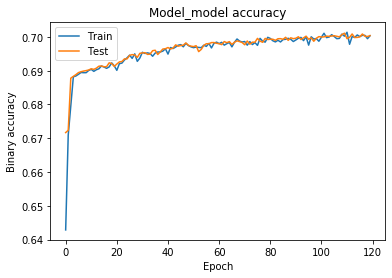

In [23]:
if doPlotMetrics:
    plot_accuracy_Train_vs_Test(nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,"model")

In [24]:
# overlay loss train and test
def plot_loss_Train_vs_Test(nparray_loss_Train,nparray_loss_Test,modelName):
    plt.plot(nparray_loss_Train)
    plt.plot(nparray_loss_Test)
    plt.title('Model_'+modelName+' loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'],loc="upper left")
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_graph_loss."+extension)
# done function

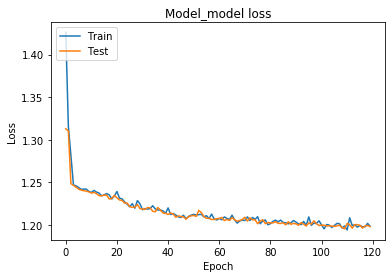

In [25]:
if doPlotMetrics:
    plot_loss_Train_vs_Test(nparray_loss_Train,nparray_loss_Test,"model")

In [26]:
def predict_from_model(model,nparray_Input_Train,nparray_Input_Test,nparray_Output_Train,nparray_Output_Test):
    outputFileNameStem="NN_4_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    
    # Train
    nparray_PredictedOutput_Train=model.predict(nparray_Input_Train)
    p("PredictedOutput_Train",nparray_PredictedOutput_Train)
    p("Output_Train",nparray_Output_Train)
    nparray_Diff_Train=nparray_PredictedOutput_Train-nparray_Output_Train
    p("Diff_Train",nparray_Diff_Train)
    # save numpy arrays to npy files
    outputFileNamePredictedOutput_Train=outputFolderName+"/"+outputFileNameStem+"_PredictedOutput_Train.npy"
    np.save(outputFileNamePredictedOutput_Train,nparray_PredictedOutput_Train)
    outputFileNameDiff_Train=outputFolderName+"/"+outputFileNameStem+"_Diff_Train.npy"
    np.save(outputFileNameDiff_Train,nparray_Diff_Train)
    
    # Test
    nparray_PredictedOutput_Test=model.predict(nparray_Input_Test)
    p("PredictedOutput_Test",nparray_PredictedOutput_Test)
    p("Output_Test",nparray_Output_Test)
    nparray_Diff_Test=nparray_PredictedOutput_Test-nparray_Output_Test
    p("Diff_Test",nparray_Diff_Test)
    # save numpy arrays to npy files
    outputFileNamePredictedOutput_Test=outputFolderName+"/"+outputFileNameStem+"_PredictedOutput_Test.npy"
    np.save(outputFileNamePredictedOutput_Test,nparray_PredictedOutput_Test)
    outputFileNameDiff_Test=outputFolderName+"/"+outputFileNameStem+"_Diff_Test.npy"
    np.save(outputFileNameDiff_Test,nparray_Diff_Test)
    
# done function    

In [27]:
if doPredict:
    predict_from_model(model,nparray_Input_Train,nparray_Input_Test,nparray_Output_Train,nparray_Output_Test)

Start PredictedOutput_Train
[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
End PredictedOutput_Train shape (1389288, 20) dtype float32 type <class 'numpy.ndarray'>
Start Output_Train
[[ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 ...
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ...  1  1 -1]]
End Output_Train shape (1389288, 20) dtype int8 type <class 'numpy.ndarray'>
Start Diff_Train
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 2.  2.  2. ... -2. -2.  0.]]
End Diff_Train shape (1389288, 20) dtype float32 type <class 'numpy.ndarray'>
Start PredictedOutput_Test
[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -

In [28]:
def load_predicted():
    outputFileNameStem="NN_4_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    
    # Train
    outputFileNamePredictedOutput_Train=outputFolderName+"/"+outputFileNameStem+"_PredictedOutput_Train.npy"
    nparray_PredictedOutput_Train=np.load(outputFileNamePredictedOutput_Train)
    outputFileNameDiff_Train=outputFolderName+"/"+outputFileNameStem+"_Diff_Train.npy"
    nparray_Diff_Train=np.load(outputFileNameDiff_Train)
    
    # Test
    outputFileNamePredictedOutput_Test=outputFolderName+"/"+outputFileNameStem+"_PredictedOutput_Test.npy"
    nparray_PredictedOutput_Test=np.load(outputFileNamePredictedOutput_Test)
    outputFileNameDiff_Test=outputFolderName+"/"+outputFileNameStem+"_Diff_Test.npy"
    nparray_Diff_Test=np.load(outputFileNameDiff_Test)
    
    return nparray_PredictedOutput_Train, nparray_Diff_Train, nparray_PredictedOutput_Test, nparray_Diff_Test
# done function   

In [29]:
if doLoadPredict:
    nparray_PredictedOutput_Train, nparray_Diff_Train, nparray_PredictedOutput_Test, nparray_Diff_Test=load_predicted()

In [30]:
def calculate_metrics2(TrainOrTest, nparray_Output, nparray_PredictedOutput, nparray_VolumeID):
    #p("nparray_Output",nparray_Output)
    #p("nparray_PredictedOutput",nparray_PredictedOutput)
    
    # for loop over i (buckets)
    # each of this for each bucket have only one value
    list_bucket_OutputPositive=[]
    list_bucket_OutputNegative=[]
    list_bucket_PredictedOutputPositive=[]
    list_bucket_PredictedOutputNegative=[]
    list_bucket_TruePositive=[]
    list_bucket_FalsePositive=[]
    list_bucket_FalseNegative=[]
    list_bucket_TrueNegative=[]
    list_bucket_accuracy=[]
    list_bucket_precision=[]
    list_bucket_recall=[]
    list_bucket_negativePredictedValue=[]
    list_bucket_trueNegativeRate=[]
    # store for each bucket four values, from which all else can be computed again (TP, FP, FN, TN)
    #list_bucket_MetricBasic=[]
    
    # for each VolumeID we sum all the buckets in that VolumeID to get the total TP,FP,FN,TN in the bucket
    # first create for each VolumeID a numpy array of MetricBasic with 4 values set to zero
    dict_VolumeID_MetricBasic={}            
    
    # loop over all the buckets
    nbBucketTotal=len(nparray_Output)
    for i in range(nbBucketTotal):
        if i%100000==0:
            print(TrainOrTest+" bucket i",i,"/",nbBucketTotal)
        nparray_bucket_Output=nparray_Output[i]
        nparray_bucket_PredictedOutput=nparray_PredictedOutput[i]
        #p("nparray_bucket_Output",nparray_bucket_Output)
        #p("nparray_bucket_PredictedOutput",nparray_bucket_PredictedOutput)
        
        # for loop over j (hit)
        counter_hit_TP=0
        counter_hit_FP=0
        counter_hit_FN=0
        counter_hit_TN=0
        for j in range(len(nparray_bucket_Output)):
            #print ("hit j",j)
            hit_Output=nparray_bucket_Output[j]
            hit_PredictedOutput=nparray_bucket_PredictedOutput[j]
            #print("j",j,"hit_PredictedOutput - hit_Output",hit_PredictedOutput, hit_Output)
               
            # confusion matrix
            # TP FP
            # FN TN
            TP=0 # True Positive
            FP=0 # False Positive (type I error)
            FN=0 # False Negative (type II error)
            TN=0 # True Negative
 
            
            
            
            # for this hit ask conditions
            if hit_PredictedOutput>0:
                # the value is predicted positive
                if hit_Output>0:
                    # the value is actually positive
                    TP=1
                else:
                    # the value is actually negative 
                    FP=1
                # done if 
            else:
                # the value is predicted negative
                if hit_Output>0:
                    # the value is actually positive
                    FN=1
                else:
                    # the value is actually negative
                    TN=1
                # done if
            # done if 
            # for this hit only one of these four values is 1, the rest of three are zero
            #print("i",i,"j",j,"TP",TP,"FP",FP,"FN",FN,"TN",TN)
            
            # increment counters for hits
            counter_hit_TP+=TP
            counter_hit_FP+=FP
            counter_hit_FN+=FN
            counter_hit_TN+=TN  
            
            # put the 4 basic together to create the BasicMatric for this hit as a nparray
            MetricBasic=np.array([TP,FP,FN,TN])
            # add the basic metric for this hist to the dict_VolumeID_BasicMetric depending on the VolumeID of this hit
            # this is for the i bucket and inside the j hit
            VolumeID=nparray_VolumeID[i][j]
            if VolumeID not in dict_VolumeID_MetricBasic.keys():
                dict_VolumeID_MetricBasic[VolumeID]=MetricBasic
            else:
                dict_VolumeID_MetricBasic[VolumeID]+=MetricBasic
        # done for loop over j (hit)
        #print("i",i,"counter_hit_TP",counter_hit_TP,"counter_hit_FP",counter_hit_FP,"counter_hit_FN",counter_hit_FN,"counter_hit_TN",counter_hit_TN)
        
        bucket_OutputPositive=counter_hit_TP+counter_hit_FN 
        bucket_OutputNegative=counter_hit_FP+counter_hit_TN
        bucket_PredictedOutputPositive=counter_hit_TP+counter_hit_FP
        bucket_PredictedOutputNegative=counter_hit_FN+counter_hit_TN
        
        #print("i",i,"bucket_OutputPositive",bucket_OutputPositive)
        #print("i",i,"bucket_OutputNegative",bucket_OutputNegative)
        #print("i",i,"bucket_PredictedOutputPositive",bucket_PredictedOutputPositive)
        #print("i",i,"bucket_PredictedOutputNegative",bucket_PredictedOutputNegative)
        
        
        bucket_TruePositive=counter_hit_TP
        bucket_FalsePositive=counter_hit_FP
        bucket_FalseNegative=counter_hit_FN
        bucket_TrueNegative=counter_hit_TN

        # accuracy=(TP+TN)/(TP+FP+FN+TN)=(TP+TN)/ALL, ALL=20 (20 hits in a bucket)
        # precision=(TP)/(TP+FP)=(TP)/(all that are in reality positive)=efficiency from CERN 
        # e.g. there are 100 truth electrons, efficiency = what fraction of them are also reconstricted as electrons? 
        # recall=(TP)/(TP+FN)=(TP)/(all that are predicted positive) = one minus fake rate from CERN
        # e.g. fake rate = I have reconstructed 100 electrons. What fraction of these are not in reality truth electrons
        # fake rate = What fraction of reconstructed electrons are fake electrons?
        # fake rate = (FN)/(TP+FN) = 1 - recall
        
        # accuracy
        bucket_accuracy=(counter_hit_TP+counter_hit_TN)/(counter_hit_TP+counter_hit_FP+counter_hit_FN+counter_hit_TN)
        
        # https://en.wikipedia.org/wiki/Precision_and_recall
        
        # precision
        if (counter_hit_TP+counter_hit_FP)==0:
            bucket_precision=0
        else:
            bucket_precision=(counter_hit_TP)/(counter_hit_TP+counter_hit_FP)
        # done if
        
        # recall
        if counter_hit_TP+counter_hit_FN==0:
            bucket_recall=0
        else:
            bucket_recall=(counter_hit_TP)/(counter_hit_TP+counter_hit_FN)
        # done if
        #print("i",i,"bucket_accuracy",bucket_accuracy,"bucket_precision",bucket_precision,"bucket_recall",bucket_recall)
        
        # Negative predicted values
        if counter_hit_TN+counter_hit_FN==0:
            bucket_negativePredictedValue=0
        else:
            bucket_negativePredictedValue=(counter_hit_TN)/(counter_hit_TN+counter_hit_FN)
        # done if
        
        # True negative rate
        if counter_hit_TN+counter_hit_FP==0:
            bucket_trueNegativeRate=0
        else:
            bucket_trueNegativeRate=(counter_hit_TN)/(counter_hit_TN+counter_hit_FP)
        # done if 
        
        # the four basic metric froms which everythis calculated again are all integers with max value 20
        # are put in a list and the list made a numpy array of positive integers uint8
        #bucket_MetricBasic=np.array([counter_hit_TP,counter_hit_FP,counter_hit_FN,counter_hit_TN]).astype(np.uint8)
        
        
        # add to current bucket to the list across all buckets
        list_bucket_OutputPositive.append(bucket_OutputPositive)
        list_bucket_OutputNegative.append(bucket_OutputNegative)
        list_bucket_PredictedOutputPositive.append(bucket_PredictedOutputPositive)
        list_bucket_PredictedOutputNegative.append(bucket_PredictedOutputNegative)
        list_bucket_TruePositive.append(bucket_TruePositive)
        list_bucket_FalsePositive.append(bucket_FalsePositive)
        list_bucket_FalseNegative.append(bucket_FalseNegative)
        list_bucket_TrueNegative.append(bucket_TrueNegative)
        list_bucket_accuracy.append(bucket_accuracy)
        list_bucket_precision.append(bucket_precision)
        list_bucket_recall.append(bucket_recall)
        list_bucket_negativePredictedValue.append(bucket_negativePredictedValue)
        list_bucket_trueNegativeRate.append(bucket_trueNegativeRate)
        #
        #list_bucket_MetricBasic.append(bucket_MetricBasic)
        
    # done for loop over i (bucket)
    
    #print("list_bucket_accuracy",list_bucket_accuracy)
    #print("list_bucket_precision",list_bucket_precision)
    #print("list_bucket_recall",list_bucket_recall)
    
    # convert list to numpy array
    nparray_bucket_OutputPositive=np.array(list_bucket_OutputPositive)
    nparray_bucket_OutputNegative=np.array(list_bucket_OutputNegative)
    nparray_bucket_PredictedOutputPositive=np.array(list_bucket_PredictedOutputPositive)
    nparray_bucket_PredictedOutputNegative=np.array(list_bucket_PredictedOutputNegative)
    nparray_bucket_TruePositive=np.array(list_bucket_TruePositive)
    nparray_bucket_FalsePositive=np.array(list_bucket_FalsePositive)
    nparray_bucket_FalseNegative=np.array(list_bucket_FalseNegative)
    nparray_bucket_TrueNegative=np.array(list_bucket_TrueNegative)
    nparray_bucket_accuracy=np.array(list_bucket_accuracy)
    nparray_bucket_precision=np.array(list_bucket_precision)
    nparray_bucket_recall=np.array(list_bucket_recall)
    nparray_bucket_negativePredictedValue=np.array(list_bucket_negativePredictedValue)
    nparray_bucket_trueNegativeRate=np.array(list_bucket_trueNegativeRate)
    #
    #nparray_bucket_MetricBasic=np.array(list_bucket_MetricBasic)
    
    p("nparray_bucket_OutputPositive",nparray_bucket_OutputPositive)
    p("nparray_bucket_OutputNegative",nparray_bucket_OutputNegative)
    p("nparray_bucket_PredictedOutputPositive",nparray_bucket_PredictedOutputPositive)
    p("nparray_bucket_PredictedOutputNegative",nparray_bucket_PredictedOutputNegative)
    p("nparray_bucket_TruePositive",nparray_bucket_TruePositive)
    p("nparray_bucket_FalsePositive",nparray_bucket_FalsePositive)
    p("nparray_bucket_FalseNegative",nparray_bucket_FalseNegative)
    p("nparray_bucket_TrueNegative",nparray_bucket_TrueNegative)
    p("nparray_bucket_accuracy",nparray_bucket_accuracy)
    p("nparray_bucket_precision",nparray_bucket_precision)
    p("nparray_bucket_recall",nparray_bucket_recall)
    p("nparray_bucket_negativePredictedValue",nparray_bucket_negativePredictedValue)
    p("nparray_bucket_trueNegativeRate",nparray_bucket_trueNegativeRate)
    #
    #p("nparray_bucket_MetricBasic",nparray_bucket_MetricBasic)
    
    # save numpy arrays to file, first create the common part of the name based on the current model
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    
    # create the name of each numpy array and save it
    outputFileName_OutputPositive=outputFolderName+"/"+outputFileNameStem+"_OutputPositive_"+TrainOrTest+".npy"
    np.save(outputFileName_OutputPositive,nparray_bucket_OutputPositive)
    outputFileName_OutputNegative=outputFolderName+"/"+outputFileNameStem+"_OutputNegative_"+TrainOrTest+".npy"
    np.save(outputFileName_OutputNegative,nparray_bucket_OutputNegative)
    outputFileName_OutputNegative=outputFolderName+"/"+outputFileNameStem+"_OutputNegative_"+TrainOrTest+".npy"
    np.save(outputFileName_OutputNegative,nparray_bucket_OutputNegative)
    outputFileName_PredictedOutputPositive=outputFolderName+"/"+outputFileNameStem+"_PredictedOutputPositive_"+TrainOrTest+".npy"
    np.save(outputFileName_PredictedOutputPositive,nparray_bucket_PredictedOutputPositive)
    outputFileName_PredictedOutputNegative=outputFolderName+"/"+outputFileNameStem+"_PredictedOutputNegative_"+TrainOrTest+".npy"
    np.save(outputFileName_PredictedOutputNegative,nparray_bucket_PredictedOutputNegative)
    outputFileName_TruePositive=outputFolderName+"/"+outputFileNameStem+"_TruePositive_"+TrainOrTest+".npy"
    np.save(outputFileName_TruePositive,nparray_bucket_TruePositive)
    outputFileName_FalsePositive=outputFolderName+"/"+outputFileNameStem+"_FalsePositive_"+TrainOrTest+".npy"
    np.save(outputFileName_FalsePositive,nparray_bucket_FalsePositive)
    outputFileName_FalseNegative=outputFolderName+"/"+outputFileNameStem+"_FalseNegative_"+TrainOrTest+".npy"
    np.save(outputFileName_FalseNegative,nparray_bucket_FalseNegative)
    outputFileName_TrueNegative=outputFolderName+"/"+outputFileNameStem+"_TrueNegative_"+TrainOrTest+".npy"
    np.save(outputFileName_TrueNegative,nparray_bucket_TrueNegative)
    outputFileName_accuracy=outputFolderName+"/"+outputFileNameStem+"_Accuracy_"+TrainOrTest+".npy"
    np.save(outputFileName_accuracy,nparray_bucket_accuracy)
    outputFileName_precision=outputFolderName+"/"+outputFileNameStem+"_Precision_"+TrainOrTest+".npy"
    np.save(outputFileName_precision,nparray_bucket_precision)
    outputFileName_recall=outputFolderName+"/"+outputFileNameStem+"_Recall_"+TrainOrTest+".npy"
    np.save(outputFileName_recall,nparray_bucket_recall)
    outputFileName_negativePredictedValue=outputFolderName+"/"+outputFileNameStem+"_NegativePredictedValue_"+TrainOrTest+".npy"
    np.save(outputFileName_negativePredictedValue,nparray_bucket_negativePredictedValue)
    outputFileName_trueNegativeRate=outputFolderName+"/"+outputFileNameStem+"_TrueNegativeRate_"+TrainOrTest+".npy"
    np.save(outputFileName_trueNegativeRate,nparray_bucket_trueNegativeRate)
    #
    #outputFileName_MetricBasic=outputFolderName+"/"+outputFileNameStem+"_MetricBasic_"+TrainOrTest+".npy"
    #np.save(outputFileName_MetricBasic,nparray_bucket_MetricBasic)
    
    # done all, ready to return
    return nparray_bucket_OutputPositive,nparray_bucket_OutputNegative,nparray_bucket_PredictedOutputPositive,nparray_bucket_PredictedOutputNegative,nparray_bucket_TruePositive,nparray_bucket_FalsePositive,nparray_bucket_FalseNegative,nparray_bucket_TrueNegative,nparray_bucket_accuracy,nparray_bucket_precision,nparray_bucket_recall,nparray_bucket_negativePredictedValue,nparray_bucket_trueNegativeRate,dict_VolumeID_MetricBasic
# done function

In [31]:
if doCalculateMetrics2:
    print("")
    print("Train")
    nparray_bucket_OutputPositive_Train,nparray_bucket_OutputNegative_Train,nparray_bucket_PredictedOutputPositive_Train,nparray_bucket_PredictedOutputNegative_Train,nparray_bucket_TruePositive_Train,nparray_bucket_FalsePositive_Train,nparray_bucket_FalseNegative_Train,nparray_bucket_TrueNegative_Train,nparray_bucket_accuracy_Train,nparray_bucket_precision_Train,nparray_bucket_recall_Train,nparray_bucket_negativePredictedValue_Train,nparray_bucket_trueNegativeRate_Train,dict_VolumeID_MetricBasic_Train=calculate_metrics2("Train", nparray_Output_Train, nparray_PredictedOutput_Train, nparray_VolumeID_Train)


Train
Train bucket i 0 / 1389288
Train bucket i 100000 / 1389288
Train bucket i 200000 / 1389288
Train bucket i 300000 / 1389288
Train bucket i 400000 / 1389288
Train bucket i 500000 / 1389288
Train bucket i 600000 / 1389288
Train bucket i 700000 / 1389288
Train bucket i 800000 / 1389288
Train bucket i 900000 / 1389288
Train bucket i 1000000 / 1389288
Train bucket i 1100000 / 1389288
Train bucket i 1200000 / 1389288
Train bucket i 1300000 / 1389288
Start nparray_bucket_OutputPositive
[ 6  8  9 ... 12 10 10]
End nparray_bucket_OutputPositive shape (1389288,) dtype int64 type <class 'numpy.ndarray'>
Start nparray_bucket_OutputNegative
[14 12 11 ...  8 10 10]
End nparray_bucket_OutputNegative shape (1389288,) dtype int64 type <class 'numpy.ndarray'>
Start nparray_bucket_PredictedOutputPositive
[12 12 12 ...  9 10  9]
End nparray_bucket_PredictedOutputPositive shape (1389288,) dtype int64 type <class 'numpy.ndarray'>
Start nparray_bucket_PredictedOutputNegative
[ 8  8  8 ... 11 10 11]
End

In [32]:
if doCalculateMetrics2:
    print("")
    print("Test")
    nparray_bucket_OutputPositive_Test,nparray_bucket_OutputNegative_Test,nparray_bucket_PredictedOutputPositive_Test,nparray_bucket_PredictedOutputNegative_Test,nparray_bucket_TruePositive_Test,nparray_bucket_FalsePositive_Test,nparray_bucket_FalseNegative_Test,nparray_bucket_TrueNegative_Test,nparray_bucket_accuracy_Test,nparray_bucket_precision_Test,nparray_bucket_recall_Test,nparray_bucket_negativePredictedValue_Test,nparray_bucket_trueNegativeRate_Test,dict_VolumeID_MetricBasic_Test=calculate_metrics2("Test", nparray_Output_Test, nparray_PredictedOutput_Test, nparray_VolumeID_Test)


Test
Test bucket i 0 / 609574
Test bucket i 100000 / 609574
Test bucket i 200000 / 609574
Test bucket i 300000 / 609574
Test bucket i 400000 / 609574
Test bucket i 500000 / 609574
Test bucket i 600000 / 609574
Start nparray_bucket_OutputPositive
[ 9  9  6 ... 10 11 11]
End nparray_bucket_OutputPositive shape (609574,) dtype int64 type <class 'numpy.ndarray'>
Start nparray_bucket_OutputNegative
[11 11 14 ... 10  9  9]
End nparray_bucket_OutputNegative shape (609574,) dtype int64 type <class 'numpy.ndarray'>
Start nparray_bucket_PredictedOutputPositive
[12 12 12 ...  9  9  9]
End nparray_bucket_PredictedOutputPositive shape (609574,) dtype int64 type <class 'numpy.ndarray'>
Start nparray_bucket_PredictedOutputNegative
[ 8  8  8 ... 11 11 11]
End nparray_bucket_PredictedOutputNegative shape (609574,) dtype int64 type <class 'numpy.ndarray'>
Start nparray_bucket_TruePositive
[7 9 1 ... 8 8 9]
End nparray_bucket_TruePositive shape (609574,) dtype int64 type <class 'numpy.ndarray'>
Start np

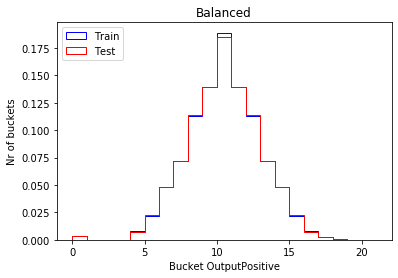

In [33]:
# overlay train and test we expect train to be better than test 
def plot_train_test_OutputPositive(nparray_bucket_OutputPositive_Train,nparray_bucket_OutputPositive_Test,modelName):
    plt.hist(nparray_bucket_OutputPositive_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step',label="Train")
    plt.hist(nparray_bucket_OutputPositive_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step',label="Test") 
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket OutputPositive')
    plt.title(modelName)
    plt.legend(loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_OutputPositive."+extension)
# done function
if doPlotMetrics2:
    plot_train_test_OutputPositive(nparray_bucket_OutputPositive_Train,nparray_bucket_OutputPositive_Test,modelName)

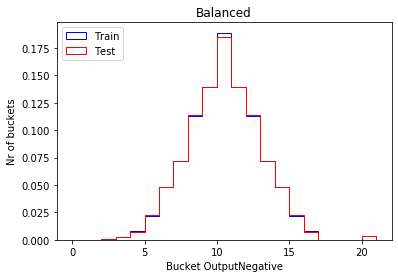

In [34]:
# overlay train and test we expect train to be better than test 
def plot_train_test_OutputNegative(nparray_bucket_OutputNegative_Train,nparray_bucket_OutputNegative_Test,modelName):
    plt.hist(nparray_bucket_OutputNegative_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step',label="Train")
    plt.hist(nparray_bucket_OutputNegative_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step',label="Test")
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket OutputNegative')
    plt.title(modelName)
    plt.legend(loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_OutputNegative."+extension)
# done function
if doPlotMetrics2:
    plot_train_test_OutputNegative(nparray_bucket_OutputNegative_Train,nparray_bucket_OutputNegative_Test,modelName)

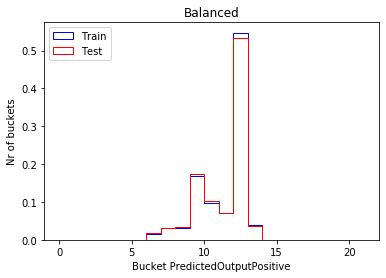

In [35]:
# overlay train and test we expect train to be better than test 
def plot_train_test_PredictedOutputPositive(nparray_bucket_PredictedOutputPositive_Train,nparray_bucket_PredictedOutputPositive_Test,modelName):
    plt.hist(nparray_bucket_PredictedOutputPositive_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step',label="Train")
    plt.hist(nparray_bucket_PredictedOutputPositive_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step',label="Test")
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket PredictedOutputPositive')
    plt.title(modelName)
    plt.legend(loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_PredictedOutputPositive."+extension)
# done function
if doPlotMetrics2:
    plot_train_test_PredictedOutputPositive(nparray_bucket_PredictedOutputPositive_Train,nparray_bucket_PredictedOutputPositive_Test,modelName)

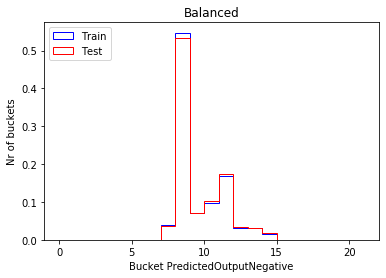

In [36]:
# overlay train and test we expect train to be better than test 
def plot_train_test_PredictedOutputNegative(nparray_bucket_PredictedOutputNegative_Train,nparray_bucket_PredictedOutputNegative_Test,modelName):
    plt.hist(nparray_bucket_PredictedOutputNegative_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step',label="Train")
    plt.hist(nparray_bucket_PredictedOutputNegative_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step',label="Test")
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket PredictedOutputNegative')
    plt.title(modelName)
    plt.legend(loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_PredictedOutputNegative."+extension)
# done function
if doPlotMetrics2:
    plot_train_test_PredictedOutputNegative(nparray_bucket_PredictedOutputNegative_Train,nparray_bucket_PredictedOutputNegative_Test,modelName)

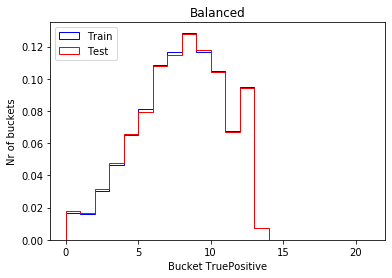

In [37]:
# overlay train and test we expect train to be better than test 
def plot_train_test_TruePositive(nparray_bucket_TruePositive_Train,nparray_bucket_TruePositive_Test,modelName):
    plt.hist(nparray_bucket_TruePositive_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step',label="Train")
    plt.hist(nparray_bucket_TruePositive_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step',label="Test")
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket TruePositive')
    plt.title(modelName)
    plt.legend(loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_TruePositive."+extension)
# done function
if doPlotMetrics2:
    plot_train_test_TruePositive(nparray_bucket_TruePositive_Train,nparray_bucket_TruePositive_Test,modelName)

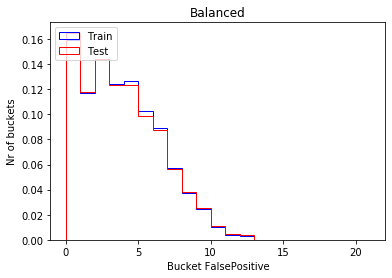

In [38]:
# overlay train and test we expect train to be better than test 
def plot_train_test_FalsePositive(nparray_bucket_FalsePositive_Train,nparray_bucket_FalsePositive_Test,modelName):
    plt.hist(nparray_bucket_FalsePositive_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step',label="Train")
    plt.hist(nparray_bucket_FalsePositive_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step',label="Test")
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket FalsePositive')
    plt.title(modelName)
    plt.legend(loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_FalsePositive."+extension)
# done function
if doPlotMetrics2:
    plot_train_test_FalsePositive(nparray_bucket_FalsePositive_Train,nparray_bucket_FalsePositive_Test,modelName)

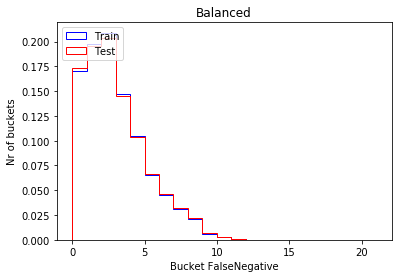

In [39]:
# overlay train and test we expect train to be better than test 
def plot_train_test_FalseNegative(nparray_bucket_FalseNegative_Train,nparray_bucket_FalseNegative_Test,modelName):
    plt.hist(nparray_bucket_FalseNegative_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step',label="Train")
    plt.hist(nparray_bucket_FalseNegative_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step',label="Test")
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket FalseNegative')
    plt.title(modelName)
    plt.legend(loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_FalseNegative."+extension)
# done function
if doPlotMetrics2:
    plot_train_test_FalseNegative(nparray_bucket_FalseNegative_Train,nparray_bucket_FalseNegative_Test,modelName)

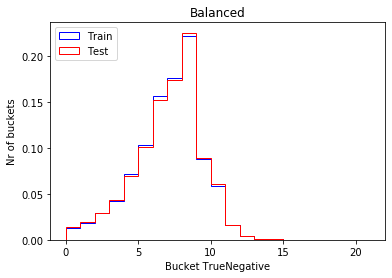

In [40]:
# overlay train and test we expect train to be better than test 
def plot_train_test_TrueNegative(nparray_bucket_TrueNegative_Train,nparray_bucket_TrueNegative_Test,modelName):
    plt.hist(nparray_bucket_TrueNegative_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step',label="Train")
    plt.hist(nparray_bucket_TrueNegative_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step',label="Test")
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket TrueNegative')
    plt.title(modelName)
    plt.legend(loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_TrueNegative."+extension)
# done function
if doPlotMetrics2:
    plot_train_test_TrueNegative(nparray_bucket_TrueNegative_Train,nparray_bucket_TrueNegative_Test,modelName)

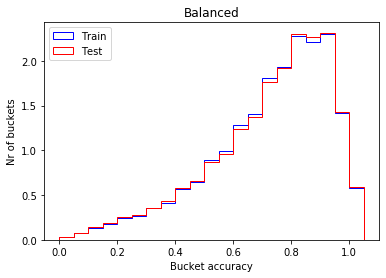

In [41]:
# overlay train and test we expect train to be better than test 
def plot_train_test_accuracy(nparray_bucket_accuracy_Train,nparray_bucket_accuracy_Test,modelName):
    plt.hist(nparray_bucket_accuracy_Train,bins=[i/20 for i in range(22)],density=True,alpha=1,color="blue",histtype='step',label="Train")
    plt.hist(nparray_bucket_accuracy_Test,bins=[i/20 for i in range(22)],density=True,alpha=1,color="red",histtype='step',label="Test")
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket accuracy')
    plt.title(modelName)
    plt.legend(loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_accuracy."+extension)
# done function
if doPlotMetrics2:
    plot_train_test_accuracy(nparray_bucket_accuracy_Train,nparray_bucket_accuracy_Test,modelName)

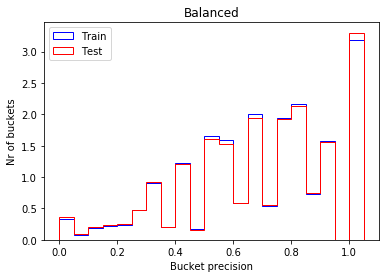

In [42]:
# overlay train and test we expect train to be better than test 
def plot_train_test_precision(nparray_bucket_precision_Train,nparray_bucket_precision_Test,modelName):
    plt.hist(nparray_bucket_precision_Train,bins=[i/20 for i in range(22)],density=True,alpha=1,color="blue",histtype='step',label="Train")
    plt.hist(nparray_bucket_precision_Test,bins=[i/20 for i in range(22)],density=True,alpha=1,color="red",histtype='step',label="Test")
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket precision')
    plt.title(modelName)
    plt.legend(loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_precision."+extension)
# done function
if doPlotMetrics2:
    plot_train_test_precision(nparray_bucket_precision_Train,nparray_bucket_precision_Test,modelName)

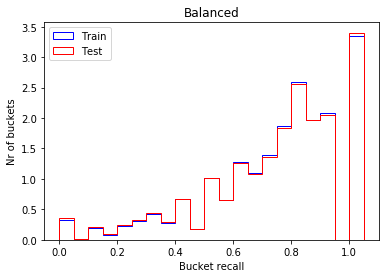

In [43]:
# overlay train and test we expect train to be better than test 
def plot_train_test_recall(nparray_bucket_recall_Train,nparray_bucket_recall_Test,modelName):
    plt.hist(nparray_bucket_recall_Train,bins=[i/20 for i in range(22)],density=True,alpha=1,color="blue",histtype='step',label="Train")
    plt.hist(nparray_bucket_recall_Test,bins=[i/20 for i in range(22)],density=True,alpha=1,color="red",histtype='step',label="Test")  
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket recall')
    plt.title(modelName)
    plt.legend(loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_recall."+extension)
# done function
if doPlotMetrics2:
    plot_train_test_recall(nparray_bucket_recall_Train,nparray_bucket_recall_Test,modelName)

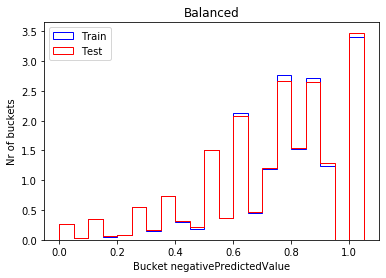

In [44]:
# overlay train and test we expect train to be better than test 
def plot_train_test_negativePredictedValue(nparray_bucket_negativePredictedValue_Train,nparray_bucket_negativePredictedValue_Test,modelName):
    plt.hist(nparray_bucket_negativePredictedValue_Train,bins=[i/20 for i in range(22)],density=True,alpha=1,color="blue",histtype='step',label="Train")
    plt.hist(nparray_bucket_negativePredictedValue_Test,bins=[i/20 for i in range(22)],density=True,alpha=1,color="red",histtype='step',label="Test")
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket negativePredictedValue')
    plt.title(modelName)
    plt.legend(loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_negativePredictedValue."+extension)
# done function
if doPlotMetrics2:
    plot_train_test_negativePredictedValue(nparray_bucket_negativePredictedValue_Train,nparray_bucket_negativePredictedValue_Test,modelName)

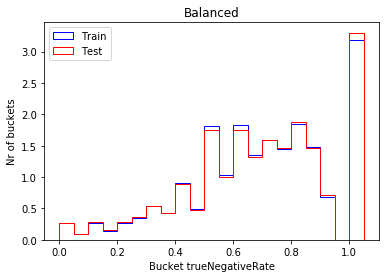

In [45]:
# overlay train and test we expect train to be better than test 
def plot_train_test_trueNegativeRate(nparray_bucket_trueNegativeRate_Train,nparray_bucket_trueNegativeRate_Test,modelName):
    plt.hist(nparray_bucket_trueNegativeRate_Train,bins=[i/20 for i in range(22)],density=True,alpha=1,color="blue",histtype='step',label="Train")
    plt.hist(nparray_bucket_trueNegativeRate_Test,bins=[i/20 for i in range(22)],density=True,alpha=1,color="red",histtype='step',label="Test")
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket trueNegativeRate')
    plt.title(modelName)
    plt.legend(loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_trueNegativeRate."+extension)
# done function
if doPlotMetrics2:
    plot_train_test_trueNegativeRate(nparray_bucket_trueNegativeRate_Train,nparray_bucket_trueNegativeRate_Test,modelName)
    

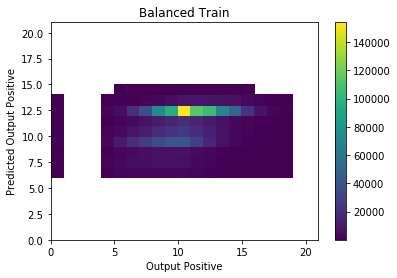

In [46]:
if doCalculateMetrics2:
    fig, ax = plt.subplots()
    h=ax.hist2d(
        nparray_bucket_OutputPositive_Train,
        nparray_bucket_PredictedOutputPositive_Train,
        bins=[range(0,22),range(0,22)],
        cmin=1
        )
    plt.colorbar(h[3], ax=ax)
    plt.xlabel("Output Positive")
    plt.ylabel("Predicted Output Positive")
    plt.title(modelName+" Train")
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_OutputPositive_vs_PredictedOutputPositive_Train."+extension)

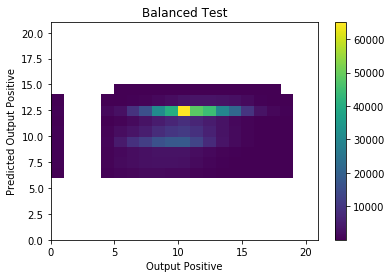

In [47]:
if doCalculateMetrics2:
    fig, ax = plt.subplots()
    h=ax.hist2d(
        nparray_bucket_OutputPositive_Test,
        nparray_bucket_PredictedOutputPositive_Test,
        bins=[range(0,22),range(0,22)],
        cmin=1
        )
    plt.colorbar(h[3], ax=ax)
    plt.xlabel("Output Positive")
    plt.ylabel("Predicted Output Positive")
    plt.title(modelName+" Test")
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_OutputPositive_vs_PredictedOutputPositive_Test."+extension)

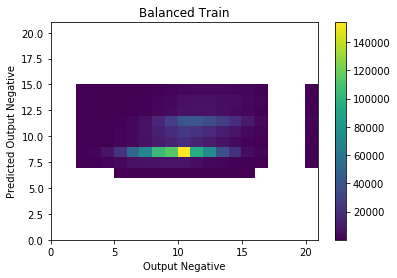

In [48]:
if doCalculateMetrics2:
    fig, ax = plt.subplots()
    h=ax.hist2d(
        nparray_bucket_OutputNegative_Train,
        nparray_bucket_PredictedOutputNegative_Train,
        bins=[range(0,22),range(0,22)],
        cmin=1,
        # norm=LogNorm()
        )
    plt.colorbar(h[3], ax=ax)
    plt.xlabel("Output Negative")
    plt.ylabel("Predicted Output Negative")
    plt.title(modelName+" Train")
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_OutputNegative_vs_PredictedOutputNegative_Train."+extension) 
    

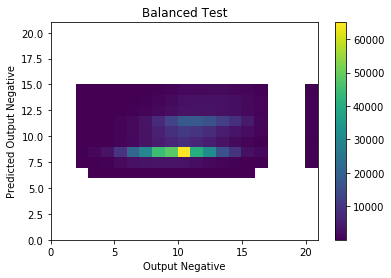

In [49]:
if doCalculateMetrics2:
    fig, ax = plt.subplots()

    h=ax.hist2d(
        nparray_bucket_OutputNegative_Test,
        nparray_bucket_PredictedOutputNegative_Test,
        bins=[range(0,22),range(0,22)],
        cmin=1
        )
    plt.colorbar(h[3], ax=ax)
    plt.xlabel("Output Negative")
    plt.ylabel("Predicted Output Negative")
    plt.title(modelName+" Test")
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    for extension in extensions.split(","):
        plt.savefig(outputFolderName+"/"+outputFileNameStem+"_histo_OutputNegative_vs_PredictedOutputNegative_Test."+extension)

In [50]:
if doCalculateMetrics2:
    # Confusion matrix Train with no reweighting
    nbHitTP=np.sum(nparray_bucket_TruePositive_Train)
    nbHitFP=np.sum(nparray_bucket_FalsePositive_Train)
    nbHitFN=np.sum(nparray_bucket_FalseNegative_Train)
    nbHitTN=np.sum(nparray_bucket_TrueNegative_Train)
    nrHitsAll=nbHitTP+nbHitFP+nbHitFN+nbHitTN
    nrHitsPercentTP=100*nbHitTP/nrHitsAll
    nrHitsPercentFP=100*nbHitFP/nrHitsAll
    nrHitsPercentFN=100*nbHitFN/nrHitsAll
    nrHitsPercentTN=100*nbHitTN/nrHitsAll
    print("Train Hits. Percent TP=%.1f FP=%.1f FN=%.1f TN=%.1f"%(nrHitsPercentTP,nrHitsPercentFP,nrHitsPercentFN,nrHitsPercentTN))

Train Hits. Percent TP=37.2 FP=17.2 FN=12.7 TN=32.8


In [51]:
if doCalculateMetrics2:
    # Confusion matrix Train with no reweighting
    nbHitTP=np.sum(nparray_bucket_TruePositive_Test)
    nbHitFP=np.sum(nparray_bucket_FalsePositive_Test)
    nbHitFN=np.sum(nparray_bucket_FalseNegative_Test)
    nbHitTN=np.sum(nparray_bucket_TrueNegative_Test)
    nrHitsAll=nbHitTP+nbHitFP+nbHitFN+nbHitTN
    nrHitsPercentTP=100*nbHitTP/nrHitsAll
    nrHitsPercentFP=100*nbHitFP/nrHitsAll
    nrHitsPercentFN=100*nbHitFN/nrHitsAll
    nrHitsPercentTN=100*nbHitTN/nrHitsAll
    print("Test Hits. Percent TP=%.1f FP=%.1f FN=%.1f TN=%.1f"%(nrHitsPercentTP,nrHitsPercentFP,nrHitsPercentFN,nrHitsPercentTN))

Test Hits. Percent TP=37.1 FP=17.1 FN=12.8 TN=32.9


In [52]:
def get_metrics(TP,FP,FN,TN,debug=False):
    
    if debug:
        print("TP",TP,"FP",FP,"FN",FN,"TN",TN)
        
    nbTotal=TP+FP+FN+TN
    #
    TPPercent=100*TP/nbTotal
    FPPercent=100*FP/nbTotal
    FNPercent=100*FN/nbTotal
    TNPercent=100*TN/nbTotal
    if debug:
        print("TPPercent",TPPercent,"FPPercent",FPPercent,"FNPercent",FNPercent,"TNPercent",TNPercent)
        
    #
    OutputPositive=TP+FN 
    OutputNegative=FP+TN
    PredictedOutputPositive=TP+FP
    PredictedOutputNegative=FN+TN
    if debug:
        print("OutputPositive",OutputPositive,"OutputNegative",OutputNegative,"PredictedOutputPositive",PredictedOutputPositive,"PredictedOutputNegative",PredictedOutputNegative)
        
    OutputPositivePercent=100*OutputPositive/nbTotal
    OutputNegativePercent=100*OutputNegative/nbTotal    
    PredictedOutputPositivePercent=100*PredictedOutputPositive/nbTotal        
    PredictedOutputNegativePercent=100*PredictedOutputNegative/nbTotal
    if debug:
        print("OutputPositivePercent",OutputPositivePercent,"OutputNegativePercent",OutputNegativePercent,"PredictedOutputPositivePercent",PredictedOutputPositivePercent,"PredictedOutputNegativePercent",PredictedOutputNegativePercent)
        
    # https://en.wikipedia.org/wiki/Precision_and_recall
    # accuracy=(TP+TN)/(TP+FP+FN+TN)=(TP+TN)/ALL, ALL=20 (20 hits in a bucket)
    # precision=(TP)/(TP+FP)=(TP)/(all that are in reality positive)=efficiency from CERN 
    # e.g. there are 100 truth electrons, efficiency = what fraction of them are also reconstricted as electrons? 
    # recall=(TP)/(TP+FN)=(TP)/(all that are predicted positive) = one minus fake rate from CERN
    # e.g. fake rate = I have reconstructed 100 electrons. What fraction of these are not in reality truth electrons
    # fake rate = What fraction of reconstructed electrons are fake electrons?
    # fake rate = (FN)/(TP+FN) = 1 - recall
        
    # accuracy
    accuracy=(TP+TN)/(TP+FP+FN+TN)

    # precision
    if (TP+FP)==0:
        precision=0
    else:
        precision=(TP)/(TP+FP)
    # done if
        
    # recall
    if TP+FN==0:
        recall=0
    else:
        recall=(TP)/(TP+FN)
    # done if
    
    # precision for negative: negative predicted value
    if TN+FN==0:
        negativePredictedValue=0
    else:
        negativePredictedValue=(TN)/(TN+FN)
    # done if
        
    # recall for negative: true negative rate
    if TN+FP==0:
        trueNegativeRate=0
    else:
        trueNegativeRate=(TN)/(TN+FP)
    # done if 
    
    if debug:
        print("accuracy",accuracy,"precision",precision,"recall",recall,"negativePredictedValue",negativePredictedValue,"trueNegativeRate",trueNegativeRate)
        
    # return only one dictionary
    dict_var_value={}
    dict_var_value["NbTotal"]=nbTotal
    dict_var_value["TP"]=TP
    dict_var_value["FP"]=FP
    dict_var_value["FN"]=FN
    dict_var_value["TN"]=TN
    dict_var_value["TPPercent"]=TPPercent
    dict_var_value["FPPercent"]=FPPercent
    dict_var_value["FNPercent"]=FNPercent
    dict_var_value["TNPercent"]=TNPercent
    dict_var_value["OutputPositive"]=OutputPositive
    dict_var_value["OutputNegative"]=OutputNegative
    dict_var_value["PredictedOutputPositive"]=PredictedOutputPositive
    dict_var_value["PredictedOutputNegative"]=PredictedOutputNegative
    dict_var_value["OutputPositivePercent"]=OutputPositivePercent
    dict_var_value["OutputNegativePercent"]=OutputNegativePercent
    dict_var_value["PredictedOutputPositivePercent"]=PredictedOutputPositivePercent
    dict_var_value["PredictedOutputNegativePercent"]=PredictedOutputNegativePercent
    dict_var_value["Accuracy"]=accuracy
    dict_var_value["Precision"]=precision
    dict_var_value["Recall"]=recall
    dict_var_value["NegativePredictedValue"]=negativePredictedValue
    dict_var_value["TrueNegativeRate"]=trueNegativeRate
    
    if debug:
        print("Print dict_var_value")
        for var in sorted(dict_var_value.keys()):
            print("var",var,"value",dict_var_value[var])
    
    # all done, ready to return
    return dict_var_value
# done function

In [53]:
def calculate_metrics3(TrainOrTest, dict_VolumeID_MetricBasic):
    if debug or verbose:
        print("Start calculate_metrics3 for ",TrainOrTest)
    
    # calculate list of VolumeID in increasing order
    list_VolumeID=sorted(dict_VolumeID_MetricBasic.keys())
    
    # now for each VolumeID we calculate all the metrics
    # so for each metric we put the values for each VolumeID one after the other
    # so we can put in a list and from the list make a nparray and save that nparray, for later to overlay plots
    dict_var_list_value={}
    # loop over volumes in their order
    for VolumeID in list_VolumeID:
        MetricBasic=dict_VolumeID_MetricBasic[VolumeID]
        TP=MetricBasic[0]
        FP=MetricBasic[1]
        FN=MetricBasic[2]
        TN=MetricBasic[3]
        # from these 4 values, calculate the other metrics and figures of merit 
        dict_var_value=get_metrics(TP,FP,FN,TN,debug=debug)
        for var in dict_var_value.keys():
            value=dict_var_value[var]
            if var not in dict_var_list_value.keys():
                # create a list with one value, value for the current VolumeID
                dict_var_list_value[var]=[value]
            else:
                # to the already existing list add value for the current VolumeID
                dict_var_list_value[var].append(value)
            # done if
        # done for loop over var
    # done for loop over VolumeID
    
    #
    outputFileNameStem=outputFolderName+"/"+"NN_7_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    
    # save the npparray_volume_id
    nparray_volume_id=np.array(list_VolumeID)
    p("nparray_volume_id",nparray_volume_id)
    var="VolumeID"
    outputFileNameNpy=outputFileNameStem+"_nparray_"+var+"_"+TrainOrTest+".npy"
    np.save(outputFileNameNpy,nparray_volume_id)
    
    # for loop over var
    for var in sorted(dict_var_list_value.keys()):
        list_value=dict_var_list_value[var]
        nparray_value=np.array(list_value)
        #p("nparray_"+var,nparray_value)
        print("var",var)
        outputFileNameNpy=outputFileNameStem+"_nparray_"+var+"_VolumeID_"+TrainOrTest+".npy"
        np.save(outputFileNameNpy,nparray_value)
        # create plot here
        plt.plot(nparray_value,marker="o")
        plt.xlabel("volume_id")
        plt.xticks(range(len(nparray_volume_id)),nparray_volume_id)
        plt.ylabel(var)
        plt.title(TrainOrTest)
        #plt.legend(loc='best')
        #plt.show()
        for extension in "png,pdf".split(","):
            plt.savefig(outputFileNameStem+"_plot_graph_"+var+"_VolumeID_"+TrainOrTest+"."+extension)
        # done for loop
        plt.close()
    # done for loop over var
    
    # calculate the percentage of the numbrer of hits in each VolumeID
    nparray_nbTotal=np.array(dict_var_list_value["NbTotal"])
    sum_nbTotal=np.sum(nparray_nbTotal)
    nparray_nbTotalPercent=100*nparray_nbTotal/sum_nbTotal
    p("nparray_nbTotalPercent",nparray_nbTotalPercent)
    var="NbTotalPercent"
    outputFileNameNpy=outputFileNameStem+"_nparray_"+var+"_VolumeID_"+TrainOrTest+".npy"
    np.save(outputFileNameNpy,nparray_nbTotalPercent)
    # create plot here
    plt.plot(nparray_value,marker="o")
    plt.xlabel("volume_id")
    plt.xticks(range(len(nparray_volume_id)),nparray_volume_id)
    plt.ylabel(var)
    plt.title(TrainOrTest)
    #plt.legend(loc='best')
    #plt.show()
    for extension in "png,pdf".split(","):
        plt.savefig(outputFileNameStem+"_plot_graph_"+var+"_VolumeID_"+TrainOrTest+"."+extension)
    # done for loop
    plt.close()
    
# done function

In [54]:
if doPlotMetrics3:
    calculate_metrics3("Train",dict_VolumeID_MetricBasic_Train)

Start calculate_metrics3 for  Train
Start nparray_volume_id
[ 7  8  9 12 13 14 16 17 18]
End nparray_volume_id shape (9,) dtype uint8 type <class 'numpy.ndarray'>
var Accuracy
var FN
var FNPercent
var FP
var FPPercent
var NbTotal
var NegativePredictedValue
var OutputNegative
var OutputNegativePercent
var OutputPositive
var OutputPositivePercent
var Precision
var PredictedOutputNegative
var PredictedOutputNegativePercent
var PredictedOutputPositive
var PredictedOutputPositivePercent
var Recall
var TN
var TNPercent
var TP
var TPPercent
var TrueNegativeRate
Start nparray_nbTotalPercent
[21.47299192 19.5215103  21.08670772  9.05593729 12.72700117  8.7750452
  2.13492451  3.06539393  2.16048796]
End nparray_nbTotalPercent shape (9,) dtype float64 type <class 'numpy.ndarray'>


In [55]:
if doPlotMetrics3:
    calculate_metrics3("Test",dict_VolumeID_MetricBasic_Train)

Start calculate_metrics3 for  Test
Start nparray_volume_id
[ 7  8  9 12 13 14 16 17 18]
End nparray_volume_id shape (9,) dtype uint8 type <class 'numpy.ndarray'>
var Accuracy
var FN
var FNPercent
var FP
var FPPercent
var NbTotal
var NegativePredictedValue
var OutputNegative
var OutputNegativePercent
var OutputPositive
var OutputPositivePercent
var Precision
var PredictedOutputNegative
var PredictedOutputNegativePercent
var PredictedOutputPositive
var PredictedOutputPositivePercent
var Recall
var TN
var TNPercent
var TP
var TPPercent
var TrueNegativeRate
Start nparray_nbTotalPercent
[21.47299192 19.5215103  21.08670772  9.05593729 12.72700117  8.7750452
  2.13492451  3.06539393  2.16048796]
End nparray_nbTotalPercent shape (9,) dtype float64 type <class 'numpy.ndarray'>
